In [1]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [2]:
num_species      = 3
n_min_per_specie = 99

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

data_dirs = util.choose_species(num_species)
data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
print(data_dirs)

#data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Batara cinerea/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiodynastes maculatus/']

['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Schiffornis virescens/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thraupis palmarum/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Sittasomus griseicapillus/']


In [13]:
print(util.FEATURES)
feat = util.FEATURES[3]
labels_dict_o, labels_o, data_o = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)
labels_dict_f1, labels_f1, data_f1 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered1')
labels_dict_f2, labels_f2, data_f2 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered2')

['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll']


In [14]:
print(labels_dict_o)
print(labels_dict_f1)
print(labels_dict_f2)

print(labels_o)
print(labels_f1)
print(labels_f2)

print(len(labels_o))
print(len(labels_f1))
print(len(labels_f2))

print(data_o[:10])
print(data_f1[:10])
print(data_f2[:10])

print(len(data_o))
print(len(data_f1))
print(len(data_f2))

{'Schiffornis Virescens': 0, 'Sittasomus Griseicapillus': 2, 'Thraupis Palmarum': 1}
{'Schiffornis Virescens': 0, 'Sittasomus Griseicapillus': 2, 'Thraupis Palmarum': 1}
{'Schiffornis Virescens': 0, 'Sittasomus Griseicapillus': 2, 'Thraupis Palmarum': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

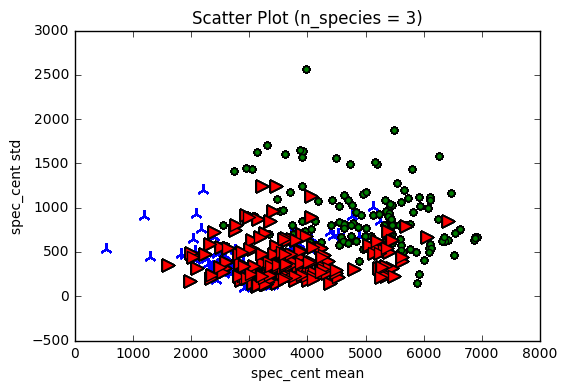

In [15]:
util.plot_scatter(data_o[:,0], data_o[:,1], labels_o, feat + ' mean', feat + ' std')

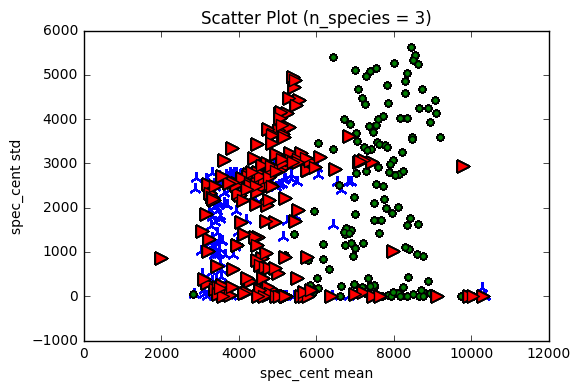

In [22]:
util.plot_scatter(data_f1[:,2], data_f1[:,3], labels_f1, feat + ' mean', feat + ' std')

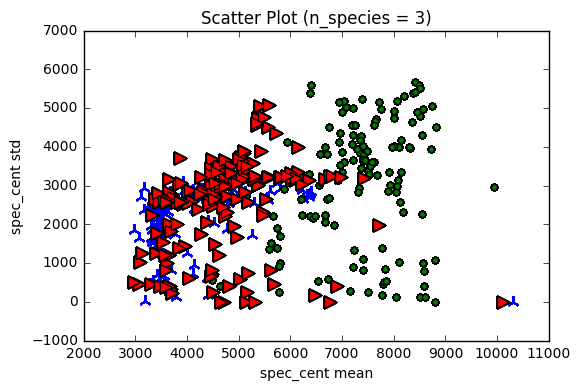

In [23]:
util.plot_scatter(data_f2[:,2], data_f2[:,3], labels_f2, feat + ' mean', feat + ' std')

In [18]:
def generate_scores(clf, clf_name, data, labels, scoring, cv = 5):
    scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = cv, scoring = scoring)
    print(scores)
    print('{0} - {1}: {2:.2f} (+/- {3:.2f})'.format(clf_name, scoring, scores.mean(), scores.std() * 2))


In [19]:
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')

generate_scores(clf, 'kNN', data_o, labels_o, scoring)
generate_scores(clf, 'kNN', data_f1, labels_f1, scoring)
generate_scores(clf, 'kNN', data_f2, labels_f2, scoring)

[ 0.57866866  0.67990533  0.62776368  0.62850102  0.62607101]
kNN - f1_weighted: 0.63 (+/- 0.06)
[ 0.74026887  0.81979798  0.71433114  0.73154762  0.64165425]
kNN - f1_weighted: 0.73 (+/- 0.11)
[ 0.62210667  0.77012093  0.66536098  0.58751199  0.60165323]
kNN - f1_weighted: 0.65 (+/- 0.13)


In [20]:
clf     = GaussianNB()

generate_scores(clf, 'gNB', data_o, labels_o, scoring)
generate_scores(clf, 'gNB', data_f1, labels_f1, scoring)
generate_scores(clf, 'gNB', data_f2, labels_f2, scoring)

[ 0.56630691  0.7159259   0.6190286   0.5935333   0.70593531]
gNB - f1_weighted: 0.64 (+/- 0.12)
[ 0.65214022  0.76098044  0.73845652  0.56351342  0.78895872]
gNB - f1_weighted: 0.70 (+/- 0.16)
[ 0.62965135  0.69203575  0.75867512  0.67891431  0.75006863]
gNB - f1_weighted: 0.70 (+/- 0.10)


In [21]:
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')

generate_scores(clf, 'SVM', data_o, labels_o, scoring)
generate_scores(clf, 'SVM', data_f1, labels_f1, scoring)
generate_scores(clf, 'SVM', data_f2, labels_f2, scoring)



[ 0.57350779  0.72044518  0.70882008  0.70029034  0.67506815]
SVM - f1_weighted: 0.68 (+/- 0.11)
[ 0.66945089  0.75564628  0.67004414  0.71064844  0.69771134]
SVM - f1_weighted: 0.70 (+/- 0.06)
[ 0.64432275  0.74334186  0.689925    0.65182503  0.79330726]
SVM - f1_weighted: 0.70 (+/- 0.11)
